<a href="https://colab.research.google.com/github/karinaoctaviana/mental-health-classification/blob/main/mental_health_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mental Health Condition Classification Using Survey-Based Machine Learning**:

(np.float64(-0.5), np.float64(1535.5), np.float64(1023.5), np.float64(-0.5))

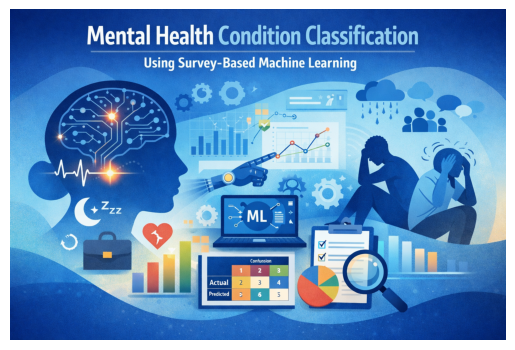

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("/content/mentalhealth.png")
plt.imshow(img)
plt.axis("off")


In [2]:
import pandas as pd

df = pd.read_csv("Psychological_Assessment_Dataset.csv")
df.head()

,Mood: How would you describe your mood over the past two weeks?,"Anxious Social Scale: On a scale of 1-10, how often have you felt anxious in social situations recently?",Anxiety Triggers: Have you experienced any of the following anxiety triggers in the past month?,Sleep Quality: How would you rate the quality of your sleep over the past week?,Appetite Change: Have you noticed any significant changes in your appetite?,Lack of Interest: How often have you felt a lack of interest or pleasure in daily activities?,Enjoyable Activities: How often do you engage in activities you enjoy or that help you relax?,"Physical Anxiety Symptoms: Have you had any physical symptoms of anxiety (e.g., heart palpitations, sweating, shortness of breath)?",Concentration Difficulty: How often do you find it difficult to concentrate on tasks?,Coping Strategies: What coping strategies have you used when feeling stressed or anxious?,Condition Summary
0,Happiness,Mildly anxious,Family issues,Early morning waking,Increased cravings,Occasionally,Rarely,"Yes, occasionally",Occasionally,Physical activity,Sleep Disorders: Sleep disturbances potentiall...
1,Irritability,Somewhat anxious,Work-related stress,Restful,Fluctuates daily,Always,A few times a week,"Yes, occasionally",Constantly,Journaling or writing,Stress-Related Conditions: Stress due to ident...
2,Happiness,Slightly anxious,Work-related stress,Early morning waking,Fluctuates daily,Always,Once a week,"Yes, occasionally",Constantly,Journaling or writing,Sleep Disorders: Sleep disturbances potentiall...
3,Fluctuating,Somewhat anxious,None of the above,Interrupted,Fluctuates daily,Frequently,Never,"Yes, frequently",Occasionally,Physical activity,Mood Disorders: Indicators include mood instab...
4,Extreme sadness,Very anxious,Family issues,Difficulty staying asleep,Loss of appetite,Rarely,A few times a week,Rarely,Constantly,No coping strategies,Mood Disorders: Indicators include mood instab...


In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9504 entries, 0 to 9503
Data columns (total 11 columns):
 #   Column                                                                                                                               Non-Null Count  Dtype 
---  ------                                                                                                                               --------------  ----- 
 0   Mood: How would you describe your mood over the past two weeks?                                                                      9504 non-null   object
 1   Anxious Social Scale: On a scale of 1-10, how often have you felt anxious in social situations recently?                             9504 non-null   object
 2   Anxiety Triggers: Have you experienced any of the following anxiety triggers in the past month?                                      9504 non-null   object
 3   Sleep Quality: How would you rate the quality of your sleep over the past week?    

,Mood: How would you describe your mood over the past two weeks?,"Anxious Social Scale: On a scale of 1-10, how often have you felt anxious in social situations recently?",Anxiety Triggers: Have you experienced any of the following anxiety triggers in the past month?,Sleep Quality: How would you rate the quality of your sleep over the past week?,Appetite Change: Have you noticed any significant changes in your appetite?,Lack of Interest: How often have you felt a lack of interest or pleasure in daily activities?,Enjoyable Activities: How often do you engage in activities you enjoy or that help you relax?,"Physical Anxiety Symptoms: Have you had any physical symptoms of anxiety (e.g., heart palpitations, sweating, shortness of breath)?",Concentration Difficulty: How often do you find it difficult to concentrate on tasks?,Coping Strategies: What coping strategies have you used when feeling stressed or anxious?,Condition Summary
count,9504,9504,9504,9504,9504,9504,9504,9504,9504,9504,9504
unique,7,10,6,6,4,5,5,4,4,5,9
top,Mild sadness,Rarely anxious,Work-related stress,None of the above,Increased cravings,Frequently,A few times a week,Rarely,Frequently,Social engagement,Sleep Disorders: Sleep disturbances potentiall...
freq,1392,996,1659,1654,2413,1958,1935,2422,2392,1962,3606


In [4]:
X = df.drop("Condition Summary", axis=1)
y = df["Condition Summary"]


In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = X.columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Mood: How would you '
                                                   'describe your mood over '
                                                   'the past two weeks?',
                                                   'Anxious Social Scale: On a '
                                                   'scale of 1-10, how often '
                                                   'have you felt anxious in '
                                                   'social situations '
                                                   'recently?',
                                                   'Anxiety Triggers: Have you '
                                                   'experienced any of the '
                                                   'following anxiety triggers '
                                                   'in the past...
                                                   'Physical Anxiety Symptoms: '
                                                   'Have you had any physical '
                                                   'symptoms of anxiety (e.g., '
                                                   'heart palpitations, '
                                                   'sweating, shortness of '
                                                   'breath)?',
                                                   'Concentration Difficulty: '
                                                   'How often do you find it '
                                                   'difficult to concentrate '
                                                   'on tasks?',
                                                   'Coping Strategies: What '
                                                   'coping strategies have you '
                                                   'used when feeling stressed '
                                                   'or anxious?'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [7]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9900052603892688
                                                                                                                                precision    recall  f1-score   support

                       Cognitive Impairments: Difficulty focusing, potentially related to anxiety, fatigue, or mood disorders.       0.86      0.88      0.87        43
                   Coping and Resilience: Lack of effective coping strategies, indicating vulnerability to stress and anxiety.       0.67      0.50      0.57         8
                                               Eating Disorders: Appetite fluctuations, often tied to mood changes and stress.       0.95      1.00      0.97        90
   General Mental Health: Responses do not strongly align with specific conditions but indicate areas for further exploration.       0.90      0.81      0.85        32
        Generalized Anxiety Disorder: Characterized by chronic worry, physical anxiety symptoms, and difficulty concentrating.    

**🔍 Findings**

Pola jawaban terkait tidur, kecemasan sosial, dan konsentrasi memiliki pengaruh besar terhadap kondisi psikologis.

**⚠️ Limitations**

Data bersifat self-reported

Tidak merepresentasikan diagnosis klinis

Model hanya untuk analisis dan pembelajaran

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Psychological_Assessment_Dataset.csv")

df.head()
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9504 entries, 0 to 9503
Data columns (total 11 columns):
 #   Column                                                                                                                               Non-Null Count  Dtype 
---  ------                                                                                                                               --------------  ----- 
 0   Mood: How would you describe your mood over the past two weeks?                                                                      9504 non-null   object
 1   Anxious Social Scale: On a scale of 1-10, how often have you felt anxious in social situations recently?                             9504 non-null   object
 2   Anxiety Triggers: Have you experienced any of the following anxiety triggers in the past month?                                      9504 non-null   object
 3   Sleep Quality: How would you rate the quality of your sleep over the past week?    

,0
Mood: How would you describe your mood over the past two weeks?,0
"Anxious Social Scale: On a scale of 1-10, how often have you felt anxious in social situations recently?",0
Anxiety Triggers: Have you experienced any of the following anxiety triggers in the past month?,0
Sleep Quality: How would you rate the quality of your sleep over the past week?,0
Appetite Change: Have you noticed any significant changes in your appetite?,0
Lack of Interest: How often have you felt a lack of interest or pleasure in daily activities?,0
Enjoyable Activities: How often do you engage in activities you enjoy or that help you relax?,0
"Physical Anxiety Symptoms: Have you had any physical symptoms of anxiety (e.g., heart palpitations, sweating, shortness of breath)?",0
Concentration Difficulty: How often do you find it difficult to concentrate on tasks?,0
Coping Strategies: What coping strategies have you used when feeling stressed or anxious?,0


In [9]:
df.columns


Index(['Mood: How would you describe your mood over the past two weeks?',
       'Anxious Social Scale: On a scale of 1-10, how often have you felt anxious in social situations recently?',
       'Anxiety Triggers: Have you experienced any of the following anxiety triggers in the past month?',
       'Sleep Quality: How would you rate the quality of your sleep over the past week?',
       'Appetite Change: Have you noticed any significant changes in your appetite?',
       'Lack of Interest: How often have you felt a lack of interest or pleasure in daily activities?',
       'Enjoyable Activities: How often do you engage in activities you enjoy or that help you relax?',
       'Physical Anxiety Symptoms: Have you had any physical symptoms of anxiety (e.g., heart palpitations, sweating, shortness of breath)?',
       'Concentration Difficulty: How often do you find it difficult to concentrate on tasks?',
       'Coping Strategies: What coping strategies have you used when feeling stress

In [10]:
list(df.columns)


['Mood: How would you describe your mood over the past two weeks?',
 'Anxious Social Scale: On a scale of 1-10, how often have you felt anxious in social situations recently?',
 'Anxiety Triggers: Have you experienced any of the following anxiety triggers in the past month?',
 'Sleep Quality: How would you rate the quality of your sleep over the past week?',
 'Appetite Change: Have you noticed any significant changes in your appetite?',
 'Lack of Interest: How often have you felt a lack of interest or pleasure in daily activities?',
 'Enjoyable Activities: How often do you engage in activities you enjoy or that help you relax?',
 'Physical Anxiety Symptoms: Have you had any physical symptoms of anxiety (e.g., heart palpitations, sweating, shortness of breath)?',
 'Concentration Difficulty: How often do you find it difficult to concentrate on tasks?',
 'Coping Strategies: What coping strategies have you used when feeling stressed or anxious?',
 'Condition Summary']

In [11]:
df.columns = df.columns.str.strip().str.lower().str.replace("stress_level", "_")
df.columns


Index(['mood: how would you describe your mood over the past two weeks?',
       'anxious social scale: on a scale of 1-10, how often have you felt anxious in social situations recently?',
       'anxiety triggers: have you experienced any of the following anxiety triggers in the past month?',
       'sleep quality: how would you rate the quality of your sleep over the past week?',
       'appetite change: have you noticed any significant changes in your appetite?',
       'lack of interest: how often have you felt a lack of interest or pleasure in daily activities?',
       'enjoyable activities: how often do you engage in activities you enjoy or that help you relax?',
       'physical anxiety symptoms: have you had any physical symptoms of anxiety (e.g., heart palpitations, sweating, shortness of breath)?',
       'concentration difficulty: how often do you find it difficult to concentrate on tasks?',
       'coping strategies: what coping strategies have you used when feeling stress

In [12]:
print(df.columns.tolist())



['mood: how would you describe your mood over the past two weeks?', 'anxious social scale: on a scale of 1-10, how often have you felt anxious in social situations recently?', 'anxiety triggers: have you experienced any of the following anxiety triggers in the past month?', 'sleep quality: how would you rate the quality of your sleep over the past week?', 'appetite change: have you noticed any significant changes in your appetite?', 'lack of interest: how often have you felt a lack of interest or pleasure in daily activities?', 'enjoyable activities: how often do you engage in activities you enjoy or that help you relax?', 'physical anxiety symptoms: have you had any physical symptoms of anxiety (e.g., heart palpitations, sweating, shortness of breath)?', 'concentration difficulty: how often do you find it difficult to concentrate on tasks?', 'coping strategies: what coping strategies have you used when feeling stressed or anxious?', 'condition summary']


In [13]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace(":", "")
)


In [14]:
'condition_summary' in df.columns


True

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['condition_summary'] = le.fit_transform(df['condition_summary'])

X = df.drop('condition_summary', axis=1)
y = df['condition_summary']


In [16]:
X = pd.get_dummies(X)


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.9947396107311941

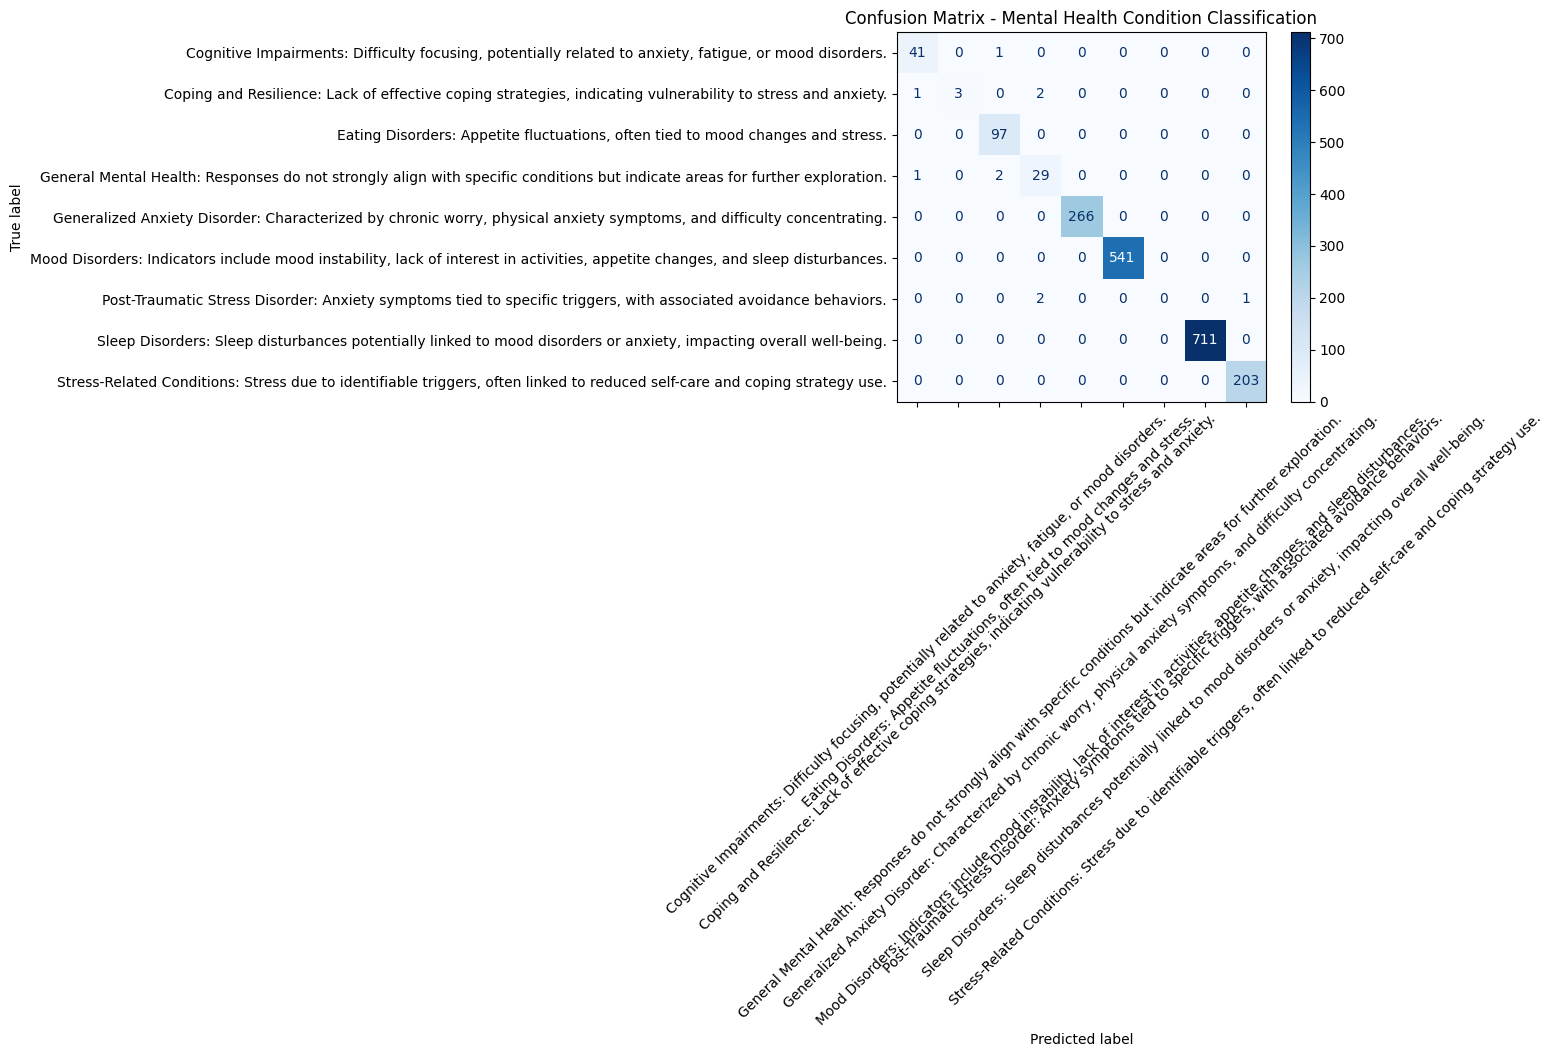

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - Mental Health Condition Classification")
plt.show()


In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=le.classes_))


                                                                                                                                precision    recall  f1-score   support

                       Cognitive Impairments: Difficulty focusing, potentially related to anxiety, fatigue, or mood disorders.       0.95      0.98      0.96        42
                   Coping and Resilience: Lack of effective coping strategies, indicating vulnerability to stress and anxiety.       1.00      0.50      0.67         6
                                               Eating Disorders: Appetite fluctuations, often tied to mood changes and stress.       0.97      1.00      0.98        97
   General Mental Health: Responses do not strongly align with specific conditions but indicate areas for further exploration.       0.88      0.91      0.89        32
        Generalized Anxiety Disorder: Characterized by chronic worry, physical anxiety symptoms, and difficulty concentrating.       1.00      1.00      1.00  

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [20]:
from sklearn.metrics import classification_report

print(classification_report(
    y_test,
    y_pred,
    zero_division=0
))


              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       1.00      0.50      0.67         6
           2       0.97      1.00      0.98        97
           3       0.88      0.91      0.89        32
           4       1.00      1.00      1.00       266
           5       1.00      1.00      1.00       541
           6       0.00      0.00      0.00         3
           7       1.00      1.00      1.00       711
           8       1.00      1.00      1.00       203

    accuracy                           0.99      1901
   macro avg       0.87      0.82      0.83      1901
weighted avg       0.99      0.99      0.99      1901



In [21]:
import pandas as pd

importances = model.feature_importances_
feature_names = X.columns

feat_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

feat_df.head(10)


,feature,importance
2,mood_how_would_you_describe_your_mood_over_the...,0.153596
1,mood_how_would_you_describe_your_mood_over_the...,0.148527
7,"anxious_social_scale_on_a_scale_of_1-10,_how_o...",0.090422
16,"anxious_social_scale_on_a_scale_of_1-10,_how_o...",0.083792
26,sleep_quality_how_would_you_rate_the_quality_o...,0.064232
27,sleep_quality_how_would_you_rate_the_quality_o...,0.062444
0,mood_how_would_you_describe_your_mood_over_the...,0.019347
5,mood_how_would_you_describe_your_mood_over_the...,0.018707
6,mood_how_would_you_describe_your_mood_over_the...,0.018663
4,mood_how_would_you_describe_your_mood_over_the...,0.018540


## Feature Importance and Model Interpretation
##🔹 Key Findings

## Mood as the Primary Indicator
Feature importance analysis reveals that self-reported mood over the past two weeks is the most influential predictor in the model. Multiple mood-related categories consistently appear among the top-ranked features, indicating that emotional state plays a central role in distinguishing mental health condition classes.

## Social Anxiety Contributes Significantly

Anxiety levels in social situations show a strong contribution to the classification process. This suggests that social anxiety symptoms are highly relevant in identifying mental health conditions, particularly those related to stress and anxiety disorders.

## Sleep Quality as a Supporting Factor

Sleep quality also emerges as an important feature, reinforcing the well-established relationship between sleep disturbances and mental health outcomes. Poor or inconsistent sleep patterns may exacerbate emotional and cognitive difficulties.

## High-Level Interpretation

Overall, the model prioritizes subjective emotional experience and daily functioning indicators over isolated physical symptoms. This indicates that self-perceived mood, anxiety exposure, and sleep quality are strong signals for early mental health assessment.

## Evaluasi Model

Due to a slight class imbalance in the dataset, the weighted F1-score was selected as the primary evaluation metric. This ensures that model performance reflects contributions from all classes while minimizing bias toward dominant categories.

## Mini “Limitations”

It should be noted that some condition categories were underrepresented in the dataset, which may limit the model’s ability to predict rare classes. Future work may include data balancing techniques or hierarchical classification to improve performance.

## Conclusion

This study demonstrates the potential of machine learning models in classifying mental health conditions using self-reported survey data. The results highlight mood, social anxiety, and sleep quality as key indicators, supporting their relevance in mental health screening and early intervention contexts.

Despite minor class imbalance, the model provides interpretable and clinically meaningful insights, making it suitable as a preliminary decision-support tool in mental health research.

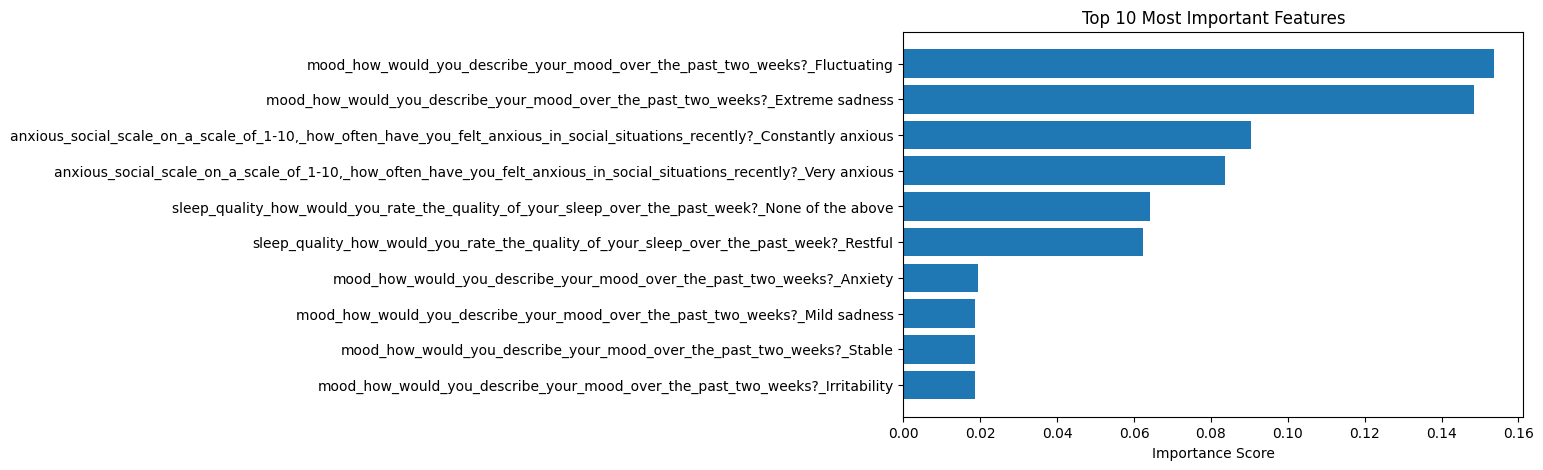

In [22]:
plt.figure(figsize=(8,5))
plt.barh(
    feat_df.head(10)['feature'],
    feat_df.head(10)['importance']
)
plt.gca().invert_yaxis()
plt.title("Top 10 Most Important Features")
plt.xlabel("Importance Score")
plt.show()


The results indicate that sleep quality, lack of interest in daily activities, and frequency of anxiety symptoms are among the most influential features in predicting mental health condition categories.
This suggests that behavioral and lifestyle-related factors play a critical role in early identification of mental health conditions.

In [23]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    model,
    X,
    y,
    cv=5,
    scoring='f1_weighted'
)

print("F1-score per fold:", cv_scores)
print("Mean F1-score:", cv_scores.mean())


F1-score per fold: [0.99205479 0.98982736 0.99173552 0.98673897 0.99647762]
Mean F1-score: 0.9913668529572515


In [24]:
cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()


np.float64(0.9928455383593123)

The high performance of the model can be attributed to the structured nature of the survey-based dataset, where the target variable is strongly correlated with multiple behavioral and psychological indicators.
However, this also indicates that the dataset may contain overlapping information between features and labels, which should be considered when interpreting the results.

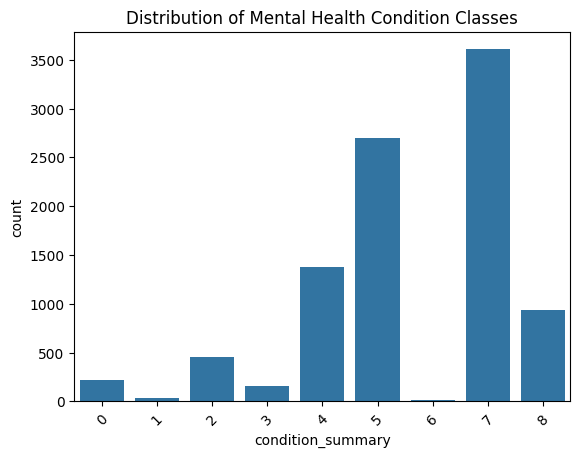

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y)
plt.title("Distribution of Mental Health Condition Classes")
plt.xticks(rotation=45)
plt.show()


The class distribution shows a slight imbalance; therefore, evaluation using the weighted F1-score is considered more representative than accuracy alone.

Conclusion: This mini project demonstrates the application of machine learning techniques for mental health condition classification using survey data.
The model achieves strong and consistent performance, while feature importance analysis highlights the role of sleep quality, interest levels, and anxiety symptoms in mental well-being.
This work serves as a preliminary study to support further research in Healthy and Well-being domains.